# Clustering con Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

In [2]:
data = pd.read_csv("../datasets/wine/winequality-red.csv",sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.shape

(1599, 12)

In [4]:
data.size

19188

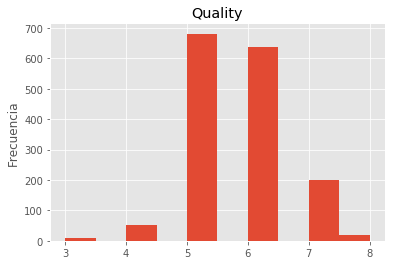

In [5]:
plt.hist(data["quality"])
plt.ylabel("Frecuencia")
plt.title("Quality")
plt.show()

In [6]:
data.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


## Normalización de los datos

In [7]:
df_norm = (data-data.min())/(data.max()-data.min())
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


## Clustering Jerárquico con Scikit-learn

In [8]:
from sklearn.cluster import AgglomerativeClustering

In [9]:
?AgglomerativeClustering
# Recursively merges the pair of clusters that minimally increases
# a given linkage distance.

In [10]:
clust = AgglomerativeClustering(n_clusters=6, linkage="ward").fit(df_norm)
clust

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=6,
            pooling_func='deprecated')

In [11]:
md_h = pd.Series(clust.labels_)
md_h.head()

0    2
1    2
2    2
3    3
4    2
dtype: int64

In [12]:
np.unique(md_h)

array([0, 1, 2, 3, 4, 5], dtype=int64)

Text(0, 0.5, 'Número de Vinos del Cluster')

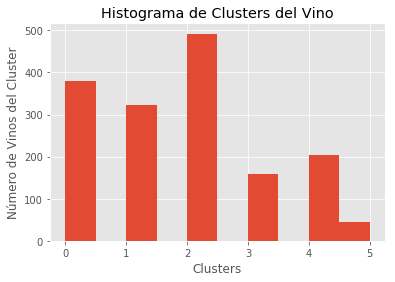

In [13]:
plt.hist(md_h)
plt.title("Histograma de Clusters del Vino")
plt.xlabel("Clusters")
plt.ylabel("Número de Vinos del Cluster")

In [14]:
# ?clust.children_
# An array object represents a multidimensional, homogeneous array
# of fixed-size items.  An associated data-type object describes the
# format of each element in the array (its byte-order, how many bytes it
# occupies in memory, whether it is an integer, a floating point number,
# or something else, etc.)

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [16]:
z = linkage(df_norm, "ward")

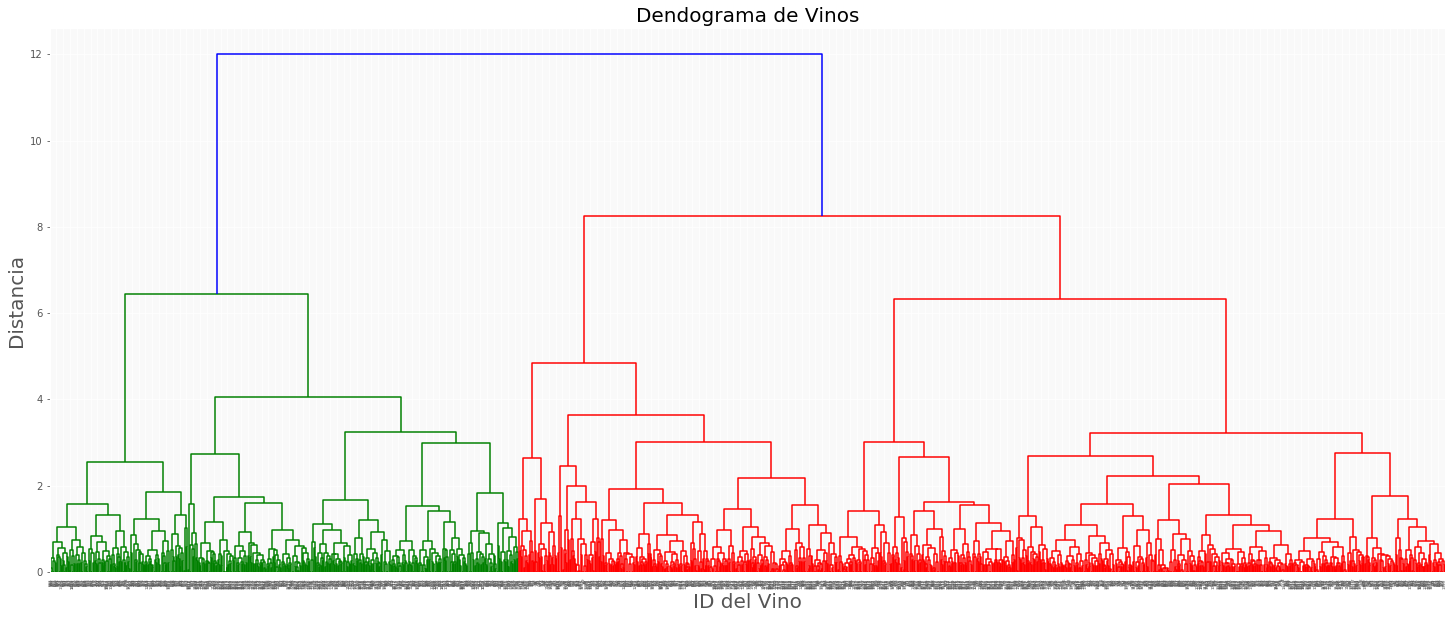

In [17]:
plt.figure(figsize=(25,10))
plt.title("Dendograma de Vinos",size=20)
plt.xlabel("ID del Vino", size=20)
plt.ylabel("Distancia",size=20)
dendrogram(z,leaf_rotation=90,leaf_font_size=4,p=20,)
plt.show()

## K- Means

In [18]:
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans # Te da los centroides
from sklearn import datasets

In [19]:
model = KMeans(n_clusters=6)
model.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
model.labels_

array([4, 4, 4, ..., 3, 3, 5])

In [21]:
len(model.labels_)

1599

In [22]:
md_k = pd.Series(model.labels_)
md_k.head()

0    4
1    4
2    4
3    1
4    4
dtype: int32

In [23]:
df_norm["Clust_Hierarchy"] = md_h
df_norm["Clust_K-Mean"] = md_k
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Clust_Hierarchy,Clust_K-Mean
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,1
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,4


In [24]:
sum(md_h==md_k)/len(md_h)

0.03189493433395872

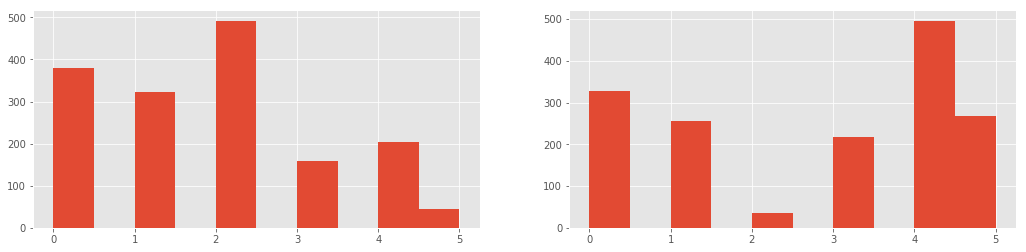

In [25]:
fig, (ax,ax1) = plt.subplots(1,2)
ax.hist(md_h)
ax1.hist(md_k)
plt.subplots_adjust(right=2.4)
plt.show()

In [26]:
model.cluster_centers_

array([[0.30981545, 0.28454937, 0.28759146, 0.13216255, 0.1240024 ,
        0.36486603, 0.28677928, 0.52980508, 0.43974457, 0.17438294,
        0.21091307, 0.44756098],
       [0.57751171, 0.20205479, 0.50588235, 0.12986839, 0.1303807 ,
        0.13620547, 0.08994665, 0.65301028, 0.33595801, 0.22402254,
        0.28908999, 0.54823529],
       [0.3585335 , 0.29031311, 0.48314286, 0.18121331, 0.49325066,
        0.28450704, 0.23977789, 0.57488987, 0.25016873, 0.55449102,
        0.14989011, 0.46285714],
       [0.17297231, 0.32386578, 0.0909633 , 0.09340832, 0.09507436,
        0.25129216, 0.12592797, 0.32056878, 0.58108791, 0.18689227,
        0.49487179, 0.61376147],
       [0.26361333, 0.35980308, 0.11854839, 0.09243123, 0.12374118,
        0.13943946, 0.10129802, 0.49161575, 0.48769685, 0.1550367 ,
        0.22363007, 0.44314516],
       [0.36124093, 0.15941973, 0.42853933, 0.11410395, 0.10550043,
        0.17486944, 0.09573722, 0.41089057, 0.41882686, 0.23530467,
        0.48954192,

In [27]:
kmeans(df_norm,6,iter=10000)

(array([[0.47405682, 0.19704398, 0.45147368, 0.17354001, 0.13281785,
         0.1647146 , 0.09819602, 0.61462246, 0.38615831, 0.22666246,
         0.2837247 , 0.52842105, 0.16842105, 1.06315789],
        [0.31093493, 0.28235599, 0.29321767, 0.13393976, 0.12380782,
         0.3620207 , 0.28877172, 0.53060307, 0.4380387 , 0.17304823,
         0.21032112, 0.44858044, 1.00946372, 0.        ],
        [0.26472664, 0.35741799, 0.11359918, 0.09506401, 0.12146352,
         0.14615916, 0.10360077, 0.48800333, 0.48880086, 0.15559066,
         0.23313932, 0.4605317 , 1.95092025, 3.96319018],
        [0.6100195 , 0.21625648, 0.50937853, 0.12266852, 0.13398979,
         0.15691891, 0.10299255, 0.67167758, 0.31909782, 0.22588721,
         0.28184847, 0.5480226 , 3.05084746, 0.93785311],
        [0.19318396, 0.33360536, 0.13621277, 0.08646167, 0.15404397,
         0.23170512, 0.12990001, 0.35351329, 0.53720891, 0.24079501,
         0.43815603, 0.56340426, 4.16595745, 3.00425532],
        [0.34937187,

In [28]:
# Suma de los cuadrados internos. La distancia al cuadrado. 
model.inertia_

187.43405620400964

### Interpretación Final

In [29]:
df_norm.groupby("Clust_Hierarchy").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Clust_K-Mean
Clust_Hierarchy,,,,,,,,,,,,,
0,0.380858,0.171341,0.422691,0.109661,0.109928,0.178844,0.098362,0.450974,0.417198,0.226202,0.439821,0.653298,3.775726
1,0.311109,0.282598,0.299255,0.159683,0.126075,0.349926,0.283037,0.545567,0.441899,0.174080,0.203376,0.450932,0.496894
2,0.265613,0.356714,0.113557,0.091213,0.124109,0.147873,0.105073,0.486659,0.485132,0.156005,0.228685,0.455285,3.717480
3,0.644449,0.206477,0.548734,0.128576,0.124564,0.142271,0.098135,0.684780,0.301455,0.226218,0.296754,0.559494,1.069620
4,0.169313,0.344531,0.080000,0.089394,0.095731,0.253521,0.122151,0.329572,0.589432,0.182165,0.482944,0.578431,2.980392
5,0.335881,0.279577,0.405455,0.069894,0.430073,0.172535,0.184388,0.508911,0.274875,0.517148,0.171678,0.450000,2.295455


In [30]:
df_norm.groupby("Clust_K-Mean").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Clust_Hierarchy
Clust_K-Mean,,,,,,,,,,,,,
0,0.309815,0.284549,0.287591,0.132163,0.124002,0.364866,0.286779,0.529805,0.439745,0.174383,0.210913,0.447561,1.112805
1,0.577512,0.202055,0.505882,0.129868,0.130381,0.136205,0.089947,0.653010,0.335958,0.224023,0.289090,0.548235,1.980392
2,0.358534,0.290313,0.483143,0.181213,0.493251,0.284507,0.239778,0.574890,0.250169,0.554491,0.149890,0.462857,4.314286
3,0.172972,0.323866,0.090963,0.093408,0.095074,0.251292,0.125928,0.320569,0.581088,0.186892,0.494872,0.613761,3.472477
4,0.263613,0.359803,0.118548,0.092431,0.123741,0.139439,0.101298,0.491616,0.487697,0.155037,0.223630,0.443145,2.028226
5,0.361241,0.159420,0.428539,0.114104,0.105500,0.174869,0.095737,0.410891,0.418827,0.235305,0.489542,0.698876,0.119850
